In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold,ShuffleSplit
import numpy as np
import random
import pandas as pd
def CreateDataByRatio(data,size):
  # data_new =pd.DataFrame(columns=['label','feature'])
  data_new=[]
  # print(data[['label','feature']])
  data_random=np.array( data[['label','feature','feature_v']])
  random.shuffle(data_random)
  while len(data_new)< size:
    data_new.append(random.choice(data_random))
  return pd.DataFrame(data_new,columns=['label','feature','feature_v'])

In [ ]:
def ReadDataToCsvFile(path_csv_file):
  data=pd.read_csv(path_csv_file,encoding='utf-8', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)
  data['label'] = data['label'].apply(lambda label: 0 if label == False else 1)
  return data

In [ ]:
def GetDataByLabel(data,label):
  dataByLabel =data[data.label==label]
  return dataByLabel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [ ]:
# data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/new_clean_bo3.csv')
data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/clean_bo3_tdrive.csv')
data['feature'] = data['p_start'] + data['p_temp'] + data['p_end']
data['feature_v']= None
feature_v=[]
for index, row in data.iterrows():
  feature_v.append([row['p_start'][1],row['p_start'][0],row['p_temp'][1],row['p_temp'][0],row['p_end'][1],row['p_end'][0]])

data['feature_v']=feature_v
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 7 to 702
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   p_start      7156 non-null   object
 1   p_temp       7156 non-null   object
 2   p_end        7156 non-null   object
 3   pre_routes   7156 non-null   object
 4   pre_regions  7156 non-null   object
 5   freq         7156 non-null   int64 
 6   label        7156 non-null   int64 
 7   feature      7156 non-null   object
 8   feature_v    7156 non-null   object
dtypes: int64(2), object(7)
memory usage: 559.1+ KB


In [ ]:
# ratio test 2:8
# 2 minority
# 8 majority
# data train ratio 0.25% total data
# with total
def GetDataByRatio(total_major,total_minor,ratio_minority,ratio_majority):
  n=round(total_major/total_minor,1)
  print("n" ,n)
  n1=round(ratio_majority/ratio_minority,1)
  print("n1" ,n1)
  if n==n1:
    print("case1")
    return round(total_minor,0),round(total_major,0)
  elif n>n1:
    # giam da so dat ti le
    print("case2")
    return int(total_minor),int((total_minor)*n1)
  else:
    print("case3")
    return int((total_major)/n1) ,int(total_major)

In [ ]:
# da so
total_major=len(data[data.label==0])
# thieu so
total_minor=len(data[data.label==1])
total_minority_train,total_majority_train=GetDataByRatio(total_major,total_minor,1,100)
print("total_minority_train",total_minority_train)
print("total_minor",total_minor)
print("total_major",total_major)
print("total_majority_train",total_majority_train)
print("total_minority_train",total_minority_train)
print("ti le",total_majority_train/total_minority_train)

n 1.1
n1 100.0
case3
total_minority_train 38
total_minor 3351
total_major 3805
total_majority_train 3805
total_minority_train 38
ti le 100.13157894736842


In [ ]:
# nhom thieu so
data_minority =data[data.label==1]
# nhom da so
data_majority =data[data.label==0]
data_minor=CreateDataByRatio(data_minority,total_minority_train)
# print(len(data_minor[data_minor.label==-1]))
data_major=CreateDataByRatio(data_majority,total_majority_train)
print("data_major",len(data_major))
print("data_minor",len(data_minor))
# print(data_major)
# data_new=data_minor.join(data_major)
data_new=data_minor.append(data_major)
print("data_new",len(data_new))
print(len(data_major[data_major.label==1]))

data_major 3805
data_minor 38
data_new 3843
0


In [ ]:
import sklearn.metrics
import math
def matrix_metrix(y_true, y_pred,beta):
   CM = confusion_matrix(y_true,y_pred)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   DOR        =0 # round( LRPos/LRNeg)
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,F1,FBeta,MCC,BM,MK]})
   return (mat_met)

In [ ]:
from sklearn.metrics import classification_report,f1_score, confusion_matrix,recall_score, accuracy_score,precision_score, precision_recall_fscore_support,roc_auc_score, roc_curve, auc
from imblearn.metrics import geometric_mean_score,sensitivity_score,specificity_score
import seaborn as sn

import matplotlib.pyplot as plt
def clf_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=['Normal','Anomaly']))
    cm = confusion_matrix(y_true,y_pred, labels=[-1,1])
    print(cm)
    df_cm = pd.DataFrame(cm,columns = ['Normal','Anomaly'])
    df_cm = df_cm.rename(index = {0:'Normal',1:'Anomaly'})
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()
    print('Precision score',precision_score(y_pred,y_true))
    print('accuracy score',accuracy_score(y_pred,y_true))
    print('Recall score',recall_score(y_pred,y_true))
    print('G-mean score',geometric_mean_score(y_pred,y_true))
    print('F1 score',f1_score(y_pred,y_true))
    print('sensitivity_score',sensitivity_score(y_true, y_pred, average='macro'))
    print('specificity_score',specificity_score(y_true, y_pred, average='macro'))
    print('Weighted accuracy',0.5*sensitivity_score(y_true, y_pred, average='macro')+0.5* specificity_score(y_true, y_pred, average='macro'))
    print('F-statistics',(2*precision_score(y_pred,y_true)*sensitivity_score(y_true, y_pred, average='macro'))/(precision_score(y_pred,y_true)+sensitivity_score(y_true, y_pred, average='macro')))
    beta = 0.4
    mat_met = matrix_metrix(y_true,y_pred,beta)
    print (mat_met)
    return precision_recall_fscore_support(y_true,y_pred,average='macro')

In [ ]:
def clf_roc_auc(y_true,y_pred, y_proba):
  svm_roc_auc=roc_auc_score(y_true,y_pred)
  fpr,tpr,thresholds=roc_curve(y_true,y_proba)
  plt.figure()
  plt.plot(fpr,tpr,label='AUC = %0.2f'%auc(fpr,tpr))
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('Receiver operating characteristic (ROC)')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn import decomposition
# vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=False)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# X=np.array(data_new['feature_v'].tolist())
# y=data_new['label']


X=



y=data_new['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train_m = vectorizer.fit_transform(X_train)
# X_train_m=vectorizer.transform(X_train_m)
# X_test_m=vectorizer.fit_transform(X_test)
# X_test_m = vectorizer.transform(X_test)


X_train_PCA=X_train
X_test_PCA=X_test
pca = decomposition.PCA(n_components=3)
pca.fit(X_train_PCA)
X_train_PCA = pca.transform(X_train_PCA)

pca.fit(X_test_PCA)
X_test_PCA = pca.transform(X_test_PCA)
# print(X_train_PCA.shape)


print(X_test.shape)
print(X_train.shape)
print(X_test_PCA.shape)
print(X_train_PCA.shape)
# X_train_m = vectorizer.fit_transform(X_train)
# X_test_m = vectorizer.transform(X_test)
X_train_m=X_train_PCA
X_test_m=X_test_PCA

(961, 6)
(2882, 6)
(961, 3)
(2882, 3)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 
ratio_over 0.14525490231998062
ratio_under 0.6703923100181514
Counter({0: 617, 1: 414})
g_mean: 0.12328617775514987
ratio_over 0.3927268159909244
ratio_under 0.8910660913564359
Counter({0: 1258, 1: 1121})
g_mean: 0.14563073502830753
ratio_over 0.261427460539725
ratio_under 0.8814641670696703
Counter({0: 846, 1: 746})
g_mean: 0.14217200967647534
ratio_over 0.33091205953638425
ratio_under 0.6702520583706315
Counter({0: 1409, 1: 945})
g_mean: 0.10714724322114244
ratio_over 0.24063816727442283
ratio_under 0.786239181432249
Counter({0: 873, 1: 687})
g_mean: 0.1334214328462455
ratio_over 0.25658952714036415
ratio_under 0.8920068555687006
Counter({0: 820, 1: 732})
g_mean: 0.14217200967647534
ratio_over 0.3069393867927641
ratio_under 0.7520790455400226
Counter({0: 1164, 1: 876})
g_mean: 0.10693227498988056
ratio_over 0.1635452708990089
ratio

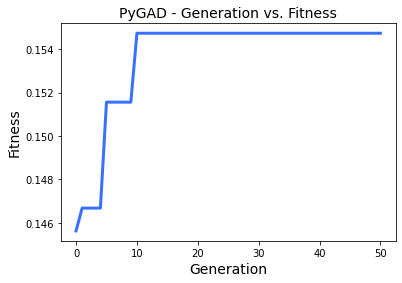

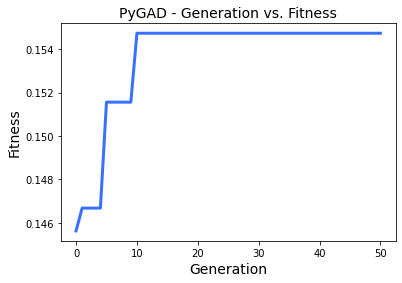

In [ ]:
!pip install pygad
import pygad
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import numpy
function_inputs = y_test
desired_output =0.2
ratio_over=0.1
ratio_under=0.9
def fitness_func_svm(solution, solution_idx):
  ratio_over=random.uniform(0.1, 0.4)
  print('ratio_over',ratio_over)
  ratio_under=random.uniform(0.6, 1)
  print('ratio_under',ratio_under)
  over = SMOTE(sampling_strategy=ratio_over)
  under = RandomUnderSampler(sampling_strategy=ratio_under)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  X_over, y_over = pipeline.fit_resample(X_train_m, y_train)
  print(Counter(y_over))
  clf = LogisticRegression(random_state=42)
  clf.fit(X_over,y_over)
  y_train_pred = clf.predict(X_over)
  y_pred=clf.predict(X_test_m)

  g_mean= geometric_mean_score(y_pred,y_test)
  print('g_mean:',g_mean)
  fitness =g_mean
  #  1.0 / numpy.abs(g_mean - desired_output)
  # except:
  #   fitness=0
  return fitness

fitness_function = fitness_func_svm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 8
num_genes = len(function_inputs)
init_range_low = -4
init_range_high =4
parent_selection_type = "sss"
keep_parents = 1
crossover_type = "single_point"
mutation_type = "random"
random_mutation_min_val=0
random_mutation_max_val=1.0
mutation_percent_genes = 10
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('solution',len(solution))
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.99       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.98      0.99      0.98       961

[[949   0]
 [ 12   0]]


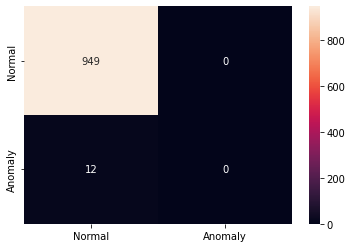

Precision score 0.0
accuracy score 0.9875130072840791
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  949.0000
2           FP    0.0000
3           FN   12.0000
4   Prevalence    0.0000
5     Accuracy    0.9875
6    Precision       NaN
7          NPV    0.9875
8          FDR       NaN
9          FOR    0.0125
10   check_Pos       NaN
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0000
14         FNR    1.0000
15         TNR    1.0000
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+       NaN
19         LR-    1.0000
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC       NaN
24          BM    0.0000
25          MK       NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

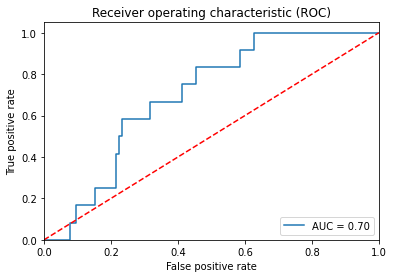

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train_m,y_train)
y_train_pred = clf.predict(X_train_m)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)

# clf = LinearSVC(C=5, tol=1e-5, max_iter=3000, random_state=42)
# clf1=CalibratedClassifierCV(clf) #them dau ra xac xuat
# clf.fit(X_train_m,y_train)
# clf1.fit(X_train_m,y_train)
# y_train_pred = clf.predict(X_train_m)

# y_pred=clf.predict(X_test_m)
# y_proba=clf1.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.99       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.98      0.99      0.98       961

[[949   0]
 [ 12   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


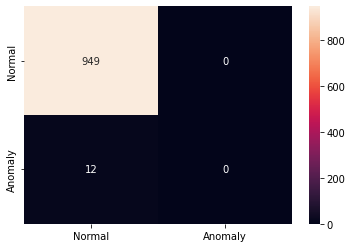

Precision score 0.0
accuracy score 0.9875130072840791
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  949.0000
2           FP    0.0000
3           FN   12.0000
4   Prevalence    0.0000
5     Accuracy    0.9875
6    Precision       NaN
7          NPV    0.9875
8          FDR       NaN
9          FOR    0.0125
10   check_Pos       NaN
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0000
14         FNR    1.0000
15         TNR    1.0000
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+       NaN
19         LR-    1.0000
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC       NaN
24          BM    0.0000
25          MK       NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

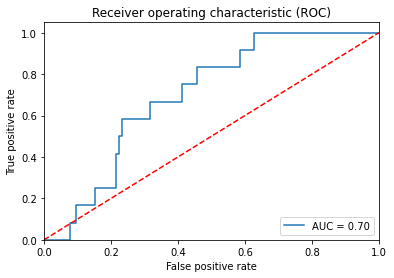

In [ ]:
from imblearn.under_sampling import TomekLinks

TomekLink = TomekLinks(sampling_strategy='majority')
X_over, y_over = TomekLink.fit_resample(X_train_m, y_train)
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 2856, 1: 26})
Counter({-1: 2856, 1: 2856})
              precision    recall  f1-score   support

      Normal       1.00      0.48      0.65       949
     Anomaly       0.02      0.83      0.04        12

    accuracy                           0.49       961
   macro avg       0.51      0.66      0.34       961
weighted avg       0.98      0.49      0.64       961

[[457 492]
 [  2  10]]


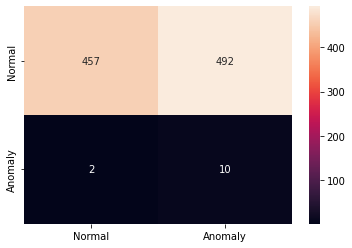

Precision score 0.8333333333333334
accuracy score 0.48595213319458896
Recall score 0.0199203187250996
G-mean score 0.14083153038541582
F1 score 0.038910505836575876
sensitivity_score 0.6574464348436951
specificity_score 0.6574464348436951
Weighted accuracy 0.6574464348436951
F-statistics 0.7350140386012448
        Metric     Value
0           TP   10.0000
1           TN  457.0000
2           FP  492.0000
3           FN    2.0000
4   Prevalence    0.5200
5     Accuracy    0.4860
6    Precision    0.0199
7          NPV    0.9956
8          FDR    0.9801
9          FOR    0.0044
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.8333
13         FPR    0.5184
14         FNR    0.1667
15         TNR    0.4816
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    1.6074
19         LR-    0.3461
20         DOR    0.0000
21          F1    0.0389
22       FBeta    0.0230
23         MCC    0.0700
24          BM    0.3149
25          MK    0.0155


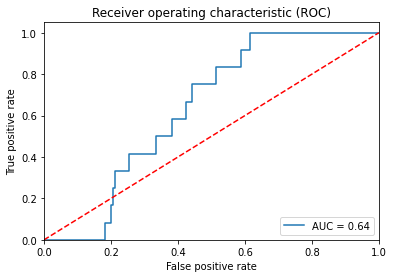

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from  sklearn.calibration  import CalibratedClassifierCV
# G_mean_score=geometric_mean_score(y_test,y_pred)
print(Counter(y_train))

oversample = SMOTE(random_state=42,k_neighbors=5)
X_over, y_over = oversample.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 2856, 1: 26})
Counter({1: 2856, -1: 2849})
              precision    recall  f1-score   support

      Normal       1.00      0.48      0.65       949
     Anomaly       0.02      0.83      0.04        12

    accuracy                           0.48       961
   macro avg       0.51      0.66      0.34       961
weighted avg       0.98      0.48      0.64       961

[[453 496]
 [  2  10]]


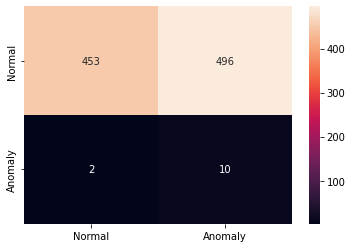

Precision score 0.8333333333333334
accuracy score 0.481789802289282
Recall score 0.019762845849802372
G-mean score 0.1402710811169406
F1 score 0.03861003861003861
sensitivity_score 0.6553389532841588
specificity_score 0.6553389532841588
Weighted accuracy 0.6553389532841588
F-statistics 0.7336951178749092
        Metric     Value
0           TP   10.0000
1           TN  453.0000
2           FP  496.0000
3           FN    2.0000
4   Prevalence    0.5300
5     Accuracy    0.4818
6    Precision    0.0198
7          NPV    0.9956
8          FDR    0.9802
9          FOR    0.0044
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.8333
13         FPR    0.5227
14         FNR    0.1667
15         TNR    0.4773
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    1.5942
19         LR-    0.3493
20         DOR    0.0000
21          F1    0.0387
22       FBeta    0.0229
23         MCC    0.0691
24          BM    0.3106
25          MK    0.0154


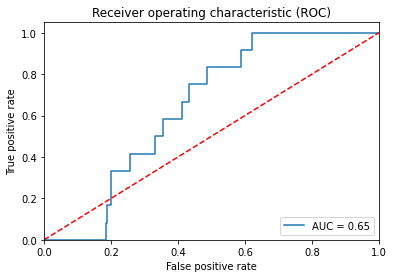

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks

print(Counter(y_train))
ratio =1
model = DecisionTreeClassifier()
count_over=int(ratio*2856)

pipe1 = make_pipeline(SMOTE(sampling_strategy={1: count_over},k_neighbors=5), TomekLinks(sampling_strategy='majority'))
X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       1.00      0.40      0.57       949
     Anomaly       0.02      0.92      0.04        12

    accuracy                           0.41       961
   macro avg       0.51      0.66      0.31       961
weighted avg       0.99      0.41      0.57       961

[[382 567]
 [  1  11]]


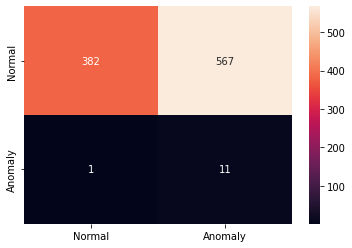

Precision score 0.9166666666666666
accuracy score 0.40894901144641
Recall score 0.01903114186851211
G-mean score 0.13777319116235595
F1 score 0.037288135593220334
sensitivity_score 0.6595978222690552
specificity_score 0.6595978222690552
Weighted accuracy 0.6595978222690552
F-statistics 0.7671699024168315
        Metric     Value
0           TP   11.0000
1           TN  382.0000
2           FP  567.0000
3           FN    1.0000
4   Prevalence    0.6000
5     Accuracy    0.4089
6    Precision    0.0190
7          NPV    0.9974
8          FDR    0.9810
9          FOR    0.0026
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.9167
13         FPR    0.5975
14         FNR    0.0833
15         TNR    0.4025
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    1.5342
19         LR-    0.2070
20         DOR    0.0000
21          F1    0.0372
22       FBeta    0.0220
23         MCC    0.0724
24          BM    0.3192
25          MK    0.0164


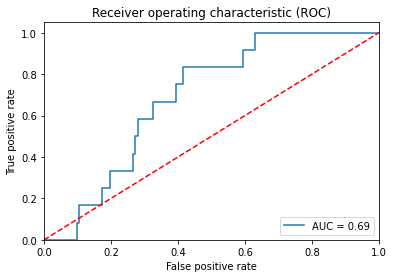

In [ ]:
from pandas.core.common import random_state
from imblearn.over_sampling import RandomOverSampler
from  sklearn.calibration  import CalibratedClassifierCV
RandomOver = RandomOverSampler(random_state=0)
X_over, y_over = RandomOver.fit_resample(X_train_m, y_train)
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 2856, 1: 26})
Counter({-1: 2856, 1: 2586})
              precision    recall  f1-score   support

      Normal       1.00      0.51      0.68       949
     Anomaly       0.02      0.83      0.04        12

    accuracy                           0.52       961
   macro avg       0.51      0.67      0.36       961
weighted avg       0.98      0.52      0.67       961

[[487 462]
 [  2  10]]


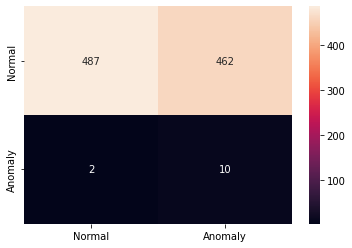

Precision score 0.8333333333333334
accuracy score 0.5171696149843913
Recall score 0.0211864406779661
G-mean score 0.14525766268549747
F1 score 0.04132231404958677
sensitivity_score 0.6732525465402177
specificity_score 0.6732525465402177
Weighted accuracy 0.6732525465402177
F-statistics 0.7447883274076664
        Metric     Value
0           TP   10.0000
1           TN  487.0000
2           FP  462.0000
3           FN    2.0000
4   Prevalence    0.4900
5     Accuracy    0.5172
6    Precision    0.0212
7          NPV    0.9959
8          FDR    0.9788
9          FOR    0.0041
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.8333
13         FPR    0.4868
14         FNR    0.1667
15         TNR    0.5132
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    1.7118
19         LR-    0.3248
20         DOR    0.0000
21          F1    0.0413
22       FBeta    0.0245
23         MCC    0.0770
24          BM    0.3465
25          MK    0.0171


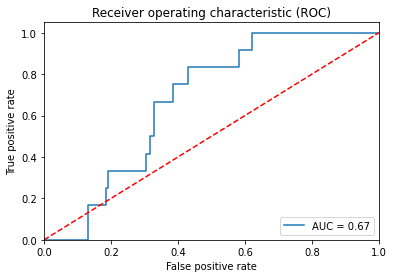

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks

print(Counter(y_train))
ratio =1

count_over=int(ratio*2586)

pipe1 = make_pipeline(RandomOverSampler(sampling_strategy={1: count_over}), TomekLinks())
X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       1.00      0.46      0.63       949
     Anomaly       0.02      0.83      0.04        12

    accuracy                           0.47       961
   macro avg       0.51      0.65      0.34       961
weighted avg       0.98      0.47      0.63       961

[[441 508]
 [  2  10]]


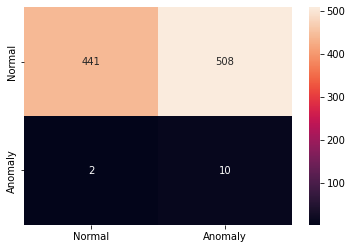

Precision score 0.8333333333333334
accuracy score 0.46930280957336107
Recall score 0.019305019305019305
G-mean score 0.13862850883442335
F1 score 0.03773584905660377
sensitivity_score 0.6490165086055497
specificity_score 0.6490165086055497
Weighted accuracy 0.6490165086055497
F-statistics 0.7297158541160673
        Metric     Value
0           TP   10.0000
1           TN  441.0000
2           FP  508.0000
3           FN    2.0000
4   Prevalence    0.5400
5     Accuracy    0.4693
6    Precision    0.0193
7          NPV    0.9955
8          FDR    0.9807
9          FOR    0.0045
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.8333
13         FPR    0.5353
14         FNR    0.1667
15         TNR    0.4647
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    1.5567
19         LR-    0.3587
20         DOR    0.0000
21          F1    0.0377
22       FBeta    0.0223
23         MCC    0.0664
24          BM    0.2980
25          MK    0.0148


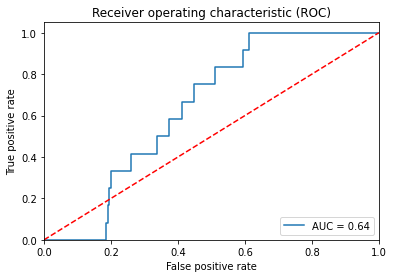

In [ ]:
from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X_over, y_over= oversample.fit_resample(X_train_m, y_train)
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      0.90      0.94       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.89       961
   macro avg       0.49      0.45      0.47       961
weighted avg       0.97      0.89      0.93       961

[[855  94]
 [ 12   0]]


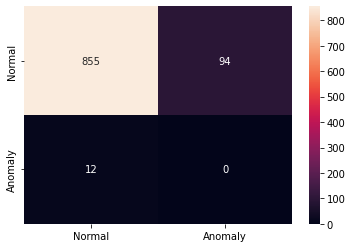

Precision score 0.0
accuracy score 0.8896982310093653
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.4504741833508957
specificity_score 0.4504741833508957
Weighted accuracy 0.4504741833508957
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  855.0000
2           FP   94.0000
3           FN   12.0000
4   Prevalence    0.1000
5     Accuracy    0.8897
6    Precision    0.0000
7          NPV    0.9862
8          FDR    1.0000
9          FOR    0.0138
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0991
14         FNR    1.0000
15         TNR    0.9009
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    0.0000
19         LR-    1.1100
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC   -0.0370
24          BM   -0.0991
25          MK   -0.0138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


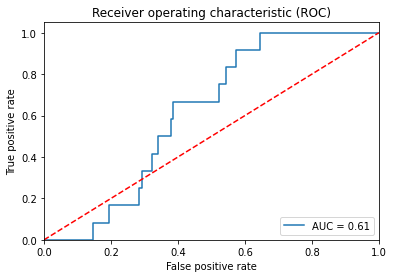

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_over, y_over = oversample.fit_resample(X_train_m, y_train)
clf = LogisticRegression(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])